# TÜBİTAK 2204-D Lise Öğrencileri İklim Değişikliği Araştırma Projeleri Yarışması 2022
# Kuraklık Tespitine Yapay Zeka ile Bakış: Konya Kapalı Havzası Kuraklık Tahmini
Çalışmamızın kodları bu sayfada mevcuttur.

Bu sayfada;

* Harita Genel Müdürlüğü İl Sınırları veri setinin incelenmesini,
* İl Sınırları veri setinden havzaya ait il ve ilçe sınırlarının seçilmesini ve düzenlenmesini
* Birleştirilen görüntülerin illere göre kırpılması ve kaydedilmesini göreceksiniz.

# Kütüphaneler
Python programlama dili ile yazılmaktadır.

earthpy ve rioxarray kütüphaneleri Kaggle'da yüklü olmadığı için ortamımıza yüklememiz gerekmektedir.

In [1]:
!pip install earthpy
!pip install rioxarray

     |████████████████████████████████| 1.4 MB 572 kB/s            
     |████████████████████████████████| 47 kB 362 kB/s            
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - \ | / - done
  Preparing metadata (pyproject.toml) ... - \ | / - done
  Created wheel for rioxarray: filename=rioxarray-0.9.1-py3-none-any.whl size=54590 sha256=74bc06074f48ca8a3d41f7f51fc6d3bc92ee1b750a0cf0ae1ef4966fc3b7e968
  Stored in directory: /root/.cache/pip/wheels/07/da/9e/1cc57b2e7a29a206893db83e984a341e2e94378263e0798229
Successfully built rioxarray


In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np

import rioxarray as rxr
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

from shapely.ops import polygonize
from shapely.geometry import Polygon, LineString, MultiLineString, MultiPolygon, mapping

import folium

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


Aynı ile ait birden fazla polygonlarımız var. Her bir şehir için teker teker geodataframe yaparak birleştirebiliriz.

# İl Sınırları Veri Setlerinin Düzenlenmesi

In [3]:
il_shp_path = "../input/2204-d-l-ve-l-e-veri-setini-d-zenleme/Il_Sinirlari_Polygon.shp"
il_shp = gpd.read_file(il_shp_path)

In [4]:
il_shp

,il,geometry
0,Nigde,"POLYGON ((35.04489 37.98317, 35.03833 37.98151..."
1,Konya,"POLYGON ((34.41157 37.35142, 34.39887 37.34340..."
2,Mersin,"POLYGON ((34.44162 37.32155, 34.44804 37.32087..."
3,Karaman,"POLYGON ((34.28436 37.22108, 34.27774 37.21775..."
4,Mersin,"POLYGON ((34.14111 37.19009, 34.13561 37.19010..."
5,Mersin,"POLYGON ((33.71372 37.02449, 33.71182 37.01303..."
6,Antalya,"POLYGON ((32.00269 37.08952, 31.99757 37.09001..."
7,Antalya,"POLYGON ((31.86966 37.23659, 31.86949 37.23662..."
8,Antalya,"POLYGON ((31.81432 37.31645, 31.81197 37.31807..."
9,Antalya,"POLYGON ((31.52532 37.33275, 31.52295 37.33075..."


In [5]:
kongeo = [] #konya
ispgeo = [] #ısparta
ankgeo = [] #ankara
aksgeo = [] #aksaray
niggeo = [] #niğde
nevgeo = [] #nevşehir
kirgeo = [] #kırşehir
kargeo = [] #karaman
mergeo = [] #mersin
antgeo = [] #antalya

In [6]:
for i in range(len(il_shp)):
    if il_shp["il"][i] == "Konya":
        kongeo.append(il_shp["geometry"][i])
    elif il_shp["il"][i] == "Isparta":
        ispgeo.append(il_shp["geometry"][i])
    elif il_shp["il"][i] == "Ankara":
        ankgeo.append(il_shp["geometry"][i])
    elif il_shp["il"][i] == "Aksaray":
        aksgeo.append(il_shp["geometry"][i])
    elif il_shp["il"][i] == "Nigde":
        niggeo.append(il_shp["geometry"][i])
    elif il_shp["il"][i] == "Nevsehir":
        nevgeo.append(il_shp["geometry"][i])
    elif il_shp["il"][i] == "Kirsehir":
        kirgeo.append(il_shp["geometry"][i])
    elif il_shp["il"][i] == "Karaman":
        kargeo.append(il_shp["geometry"][i])
    elif il_shp["il"][i] == "Mersin":
        mergeo.append(il_shp["geometry"][i])
    elif il_shp["il"][i] == "Antalya":
        antgeo.append(il_shp["geometry"][i])

In [7]:
kongeo

In [8]:
mergeo

In [9]:
nigde = gpd.GeoDataFrame( {"il" : "Nigde_il", "geometry" : niggeo}, crs = "EPSG:4326")
mersin = gpd.GeoDataFrame( {"il" : "Mersin_il", "geometry" : mergeo}, crs = "EPSG:4326")
konya = gpd.GeoDataFrame( {"il" : "Konya_il", "geometry" : kongeo}, crs = "EPSG:4326")
karaman = gpd.GeoDataFrame( {"il" : "Karaman_il", "geometry" : kargeo}, crs = "EPSG:4326")
antalya = gpd.GeoDataFrame( {"il" : "Antalya_il", "geometry" : antgeo}, crs = "EPSG:4326")
isparta = gpd.GeoDataFrame( {"il" : "Isparta_il", "geometry" : ispgeo}, crs = "EPSG:4326")
ankara = gpd.GeoDataFrame( {"il" : "Ankara_il", "geometry" : ankgeo}, crs = "EPSG:4326")
nevsehir = gpd.GeoDataFrame( {"il" : "Nevsehir_il", "geometry" : nevgeo}, crs = "EPSG:4326")
kirsehir = gpd.GeoDataFrame( {"il" : "Kirsehir_il", "geometry" : kirgeo}, crs = "EPSG:4326")
aksaray = gpd.GeoDataFrame( {"il" : "Aksaray_il", "geometry" : aksgeo}, crs = "EPSG:4326")

tekeriller = [nigde, mersin, konya, karaman, antalya, isparta, ankara, nevsehir,
             kirsehir, aksaray]

In [10]:
nigde

,il,geometry
0,Nigde_il,"POLYGON ((35.04489 37.98317, 35.03833 37.98151..."


# Uydu Görüntülerinin İl Sınırlarına Göre Kırpılması

Önceki sayfalarda birleştirdiğimiz görüntüleri kırpacağız.

In [11]:
nbalist = os.listdir("../input/2204-d-havza-ndvi-l89")
nbalist.sort()
nbalist

['Havza_2013_ndvi.tif',
 'Havza_2014_ndvi.tif',
 'Havza_2015_ndvi.tif',
 'Havza_2016_ndvi.tif',
 'Havza_2017_ndvi.tif',
 'Havza_2018_ndvi.tif',
 'Havza_2019_ndvi.tif',
 'Havza_2020_ndvi.tif',
 'Havza_2021_ndvi.tif',
 '__notebook__.ipynb',
 '__output__.json',
 '__results__.html',
 '__results___files',
 'custom.css']

In [12]:
nbalist = nbalist[:-5]
nbalist

['Havza_2013_ndvi.tif',
 'Havza_2014_ndvi.tif',
 'Havza_2015_ndvi.tif',
 'Havza_2016_ndvi.tif',
 'Havza_2017_ndvi.tif',
 'Havza_2018_ndvi.tif',
 'Havza_2019_ndvi.tif',
 'Havza_2020_ndvi.tif',
 'Havza_2021_ndvi.tif']

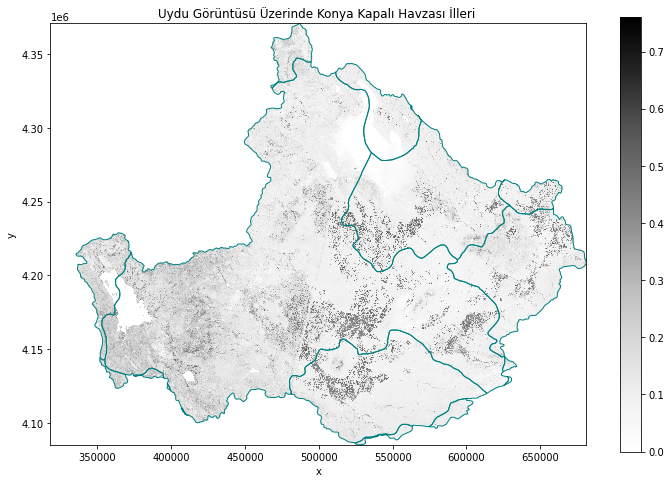

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))
img_path = "../input/2204-d-havza-ndvi-l89/Havza_2014_ndvi.tif"
img_arr = rxr.open_rasterio(img_path, masked=True).squeeze()
img_arr.plot.imshow(cmap="Greys", ax=ax)

il_shp = il_shp.to_crs(crs = img_arr.rio.crs)
il_shp.plot(color="none", edgecolor="teal" ,ax = ax)
ax.set(title="Uydu Görüntüsü Üzerinde Konya Kapalı Havzası İlleri ")
plt.show()

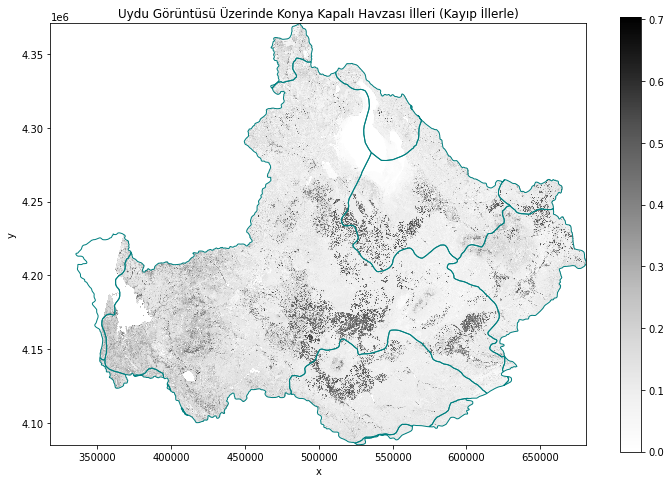

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))
img_path = "../input/2204-d-havza-ndvi-l89/Havza_2013_ndvi.tif"
img_arr = rxr.open_rasterio(img_path, masked=True).squeeze()
img_arr.plot.imshow(cmap="Greys", ax=ax)

il_shp = il_shp.to_crs(crs = img_arr.rio.crs)
il_shp.plot(color="none", edgecolor="teal" ,ax = ax)
ax.set(title="Uydu Görüntüsü Üzerinde Konya Kapalı Havzası İlleri (Kayıp İllerle)")
plt.show()

In [15]:
illist = []
for index, item in enumerate(il_shp.il):
    illist.append(item)
    
illist

['Nigde',
 'Konya',
 'Mersin',
 'Karaman',
 'Mersin',
 'Mersin',
 'Antalya',
 'Antalya',
 'Antalya',
 'Antalya',
 'Isparta',
 'Ankara',
 'Ankara',
 'Aksaray',
 'Aksaray',
 'Nevsehir']

In [16]:
for year in range(2013,2022):
    os.mkdir("./Year"+str(year))

In [17]:
def clippingiller(bandlist):
    sayac = 0
    for uydu in bandlist:
        inpath = os.path.join("../input/2204-d-kkh-birle-tirme-lemi-1/", uydu)
        year = uydu[6:10]
        
        img_arr = rxr.open_rasterio(img_path, masked=True).squeeze()
        img_arr = img_arr.rio.reproject("EPSG:4326")
        
        for gdf in tekeriller:
            #Bazen görüntü içerisinde bazı illere ait görüntüler yer almayabilir.
            try:
                clipped = img_arr.rio.clip(gdf.geometry.apply(mapping))
            except ValueError:
                continue
            il = list(enumerate(gdf.il))[0][1]
            outpath = os.path.join("./Year"+year, il+"_"+year+"_"+"ndvi.tif")
            clipped.rio.to_raster(outpath)
            
        print("****************** Yıl {} bitti *********************".format(sayac+2013))
        sayac+=1

In [18]:
clippingiller(nbalist)

/opt/conda/lib/python3.7/site-packages/rioxarray/raster_writer.py:109: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  f"The nodata value ({original_nodata}) has been automatically "


****************** Yıl 2013 bitti *********************


/opt/conda/lib/python3.7/site-packages/rioxarray/raster_writer.py:109: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  f"The nodata value ({original_nodata}) has been automatically "


****************** Yıl 2014 bitti *********************


/opt/conda/lib/python3.7/site-packages/rioxarray/raster_writer.py:109: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  f"The nodata value ({original_nodata}) has been automatically "


****************** Yıl 2015 bitti *********************


/opt/conda/lib/python3.7/site-packages/rioxarray/raster_writer.py:109: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  f"The nodata value ({original_nodata}) has been automatically "


****************** Yıl 2016 bitti *********************


/opt/conda/lib/python3.7/site-packages/rioxarray/raster_writer.py:109: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  f"The nodata value ({original_nodata}) has been automatically "


****************** Yıl 2017 bitti *********************


/opt/conda/lib/python3.7/site-packages/rioxarray/raster_writer.py:109: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  f"The nodata value ({original_nodata}) has been automatically "


****************** Yıl 2018 bitti *********************


/opt/conda/lib/python3.7/site-packages/rioxarray/raster_writer.py:109: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  f"The nodata value ({original_nodata}) has been automatically "


****************** Yıl 2019 bitti *********************


/opt/conda/lib/python3.7/site-packages/rioxarray/raster_writer.py:109: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  f"The nodata value ({original_nodata}) has been automatically "


****************** Yıl 2020 bitti *********************


/opt/conda/lib/python3.7/site-packages/rioxarray/raster_writer.py:109: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  f"The nodata value ({original_nodata}) has been automatically "


****************** Yıl 2021 bitti *********************


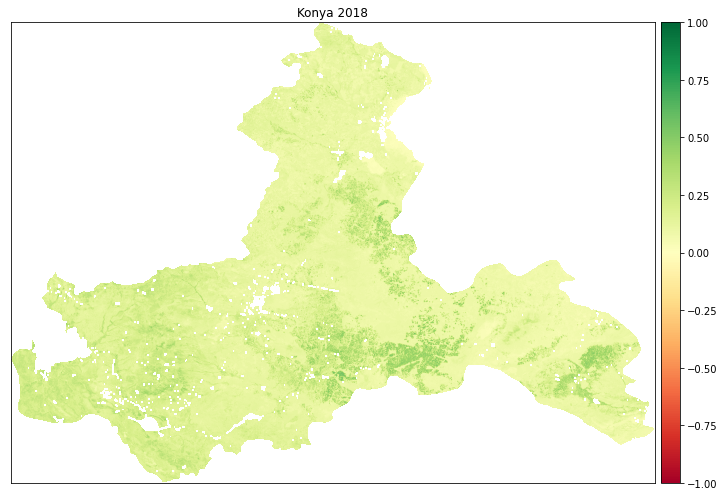

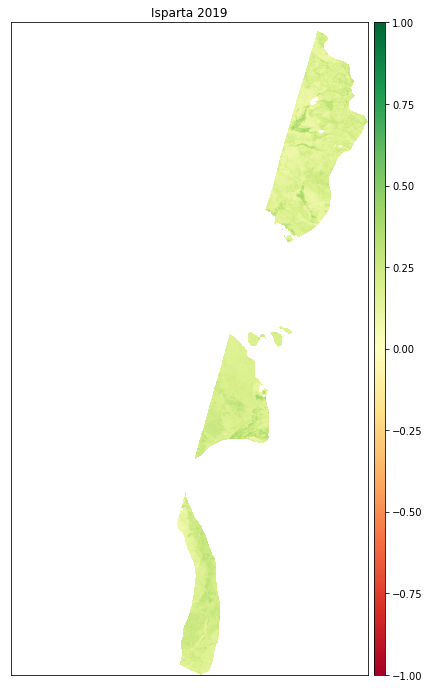

In [19]:
konyadene = rxr.open_rasterio("./Year2018/Konya_il_2018_ndvi.tif", masked = True).squeeze()
ispardene = rxr.open_rasterio("./Year2019/Isparta_il_2019_ndvi.tif", masked = True).squeeze()
ep.plot_bands(konyadene, vmin=-1, vmax = 1, cmap = "RdYlGn", title = "Konya 2018")
ep.plot_bands(ispardene, vmin=-1, vmax = 1, cmap = "RdYlGn", title = "Isparta 2019")
plt.show()

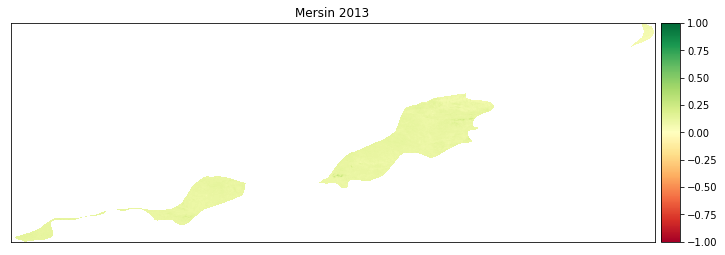

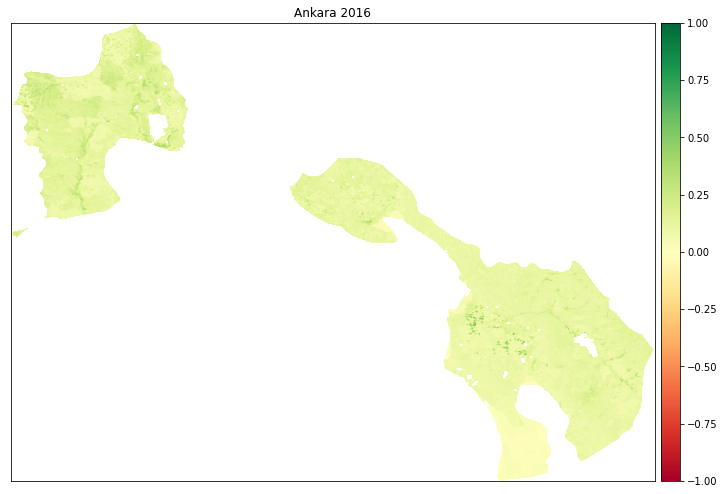

In [20]:
mersindene = rxr.open_rasterio("./Year2013/Mersin_il_2013_ndvi.tif", masked = True).squeeze()
ankaradene = rxr.open_rasterio("./Year2016/Ankara_il_2016_ndvi.tif", masked = True).squeeze()
ep.plot_bands(mersindene, vmin=-1, vmax = 1, cmap = "RdYlGn", title = "Mersin 2013")
ep.plot_bands(ankaradene, vmin=-1, vmax = 1, cmap = "RdYlGn", title = "Ankara 2016")
plt.show()